In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [6]:
# Define the positive and negative classes

# True Value is +1
positive_points = np.array([(-2, 3), (0, 1), (2,-1)])
# True Value is -1
negative_points = np.array([(-2, 1), (0, -1), (2,-3)])

In [7]:
positive_points

array([[-2,  3],
       [ 0,  1],
       [ 2, -1]])

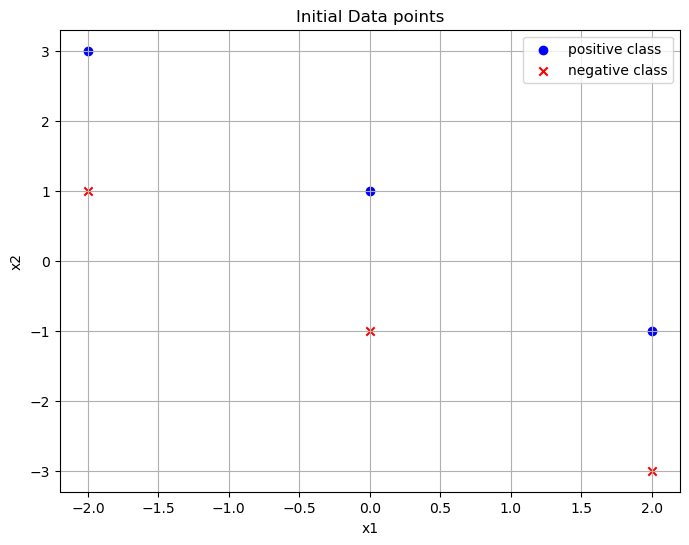

In [ ]:
# plot initial data points

plt.figure(figsize=(8,6))
plt.scatter(positive_points[:,0], positive_points[:,1], color = 'blue', marker ='o', label = 'positive class')
plt.scatter(negative_points[:,0], negative_points[:,1], color = 'red', marker ='x', label = 'negative class')
plt.legend(loc = 'best')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Initial Data points')
plt.grid(True)
plt.show()

In [10]:
# combine all dta points and labels
x = np.vstack((positive_points, negative_points))
y = np.array([1]*len(positive_points) + [-1]*len(negative_points)) 
x
y


array([ 1,  1,  1, -1, -1, -1])

In [22]:
# perceptron algorithm 

def perceptron (x, y, steps = 10):
    theta = np.zeros(x.shape[1])
    theta0 = 0
    for t in range(steps):
        for i, xi in enumerate (x):
            if y[i] *(np.dot(xi, theta) + theta0) <= 0:
                theta += y[i]*xi
                theta0 += y[i]
                break
        #  Plot after each iteration 
        plot_decision_boundary(theta, theta0, t+1)
    return theta, theta0   

In [30]:
def plot_decision_boundary(theta, theta0, iteration):
    plt.figure(figsize = (8,6))
    plt.scatter(positive_points[:,0], positive_points[:, 1], color = 'blue', label = 'Positive class')
    plt.scatter(negative_points[:,0], negative_points[:, 1], color = 'red', label = 'Negative class')
    
    # Plot decision boundary 
    x_values = np.linspace(-3, 3, 2)
    # Check for theta[1] to avoid division by zero in case of vertical line
    if theta[1] != 0:
        y_values = -(theta[0] * x_values + theta0) / theta[1]
        plt.plot(x_values, y_values, label = f'Iteration {iteration}')
    else:
        # plot vertical line
        x_val = -theta0/ theta[0]
        plt.axvline(x=x_val, label = f'Iteration {iteration}')
    
    plt.xlim(-3, 3)
    plt.ylim(-4,4)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Decision Boundary at Iteration {iteration}')
    plt.legend()
    plt.grid(True)
    plt.show()
                     

        

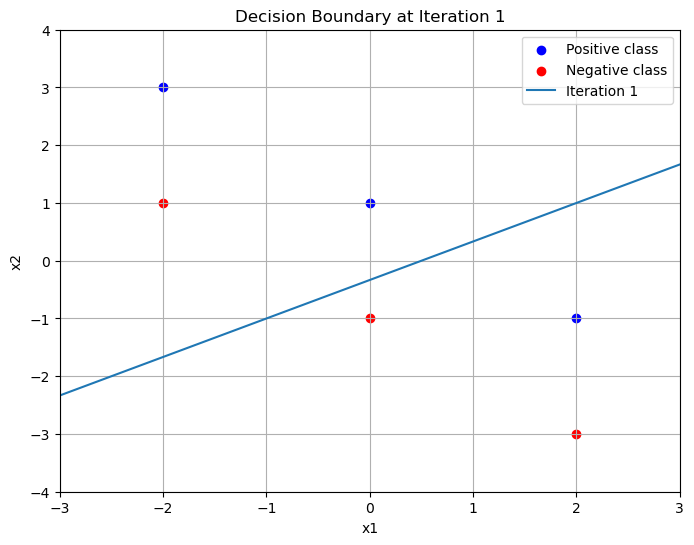

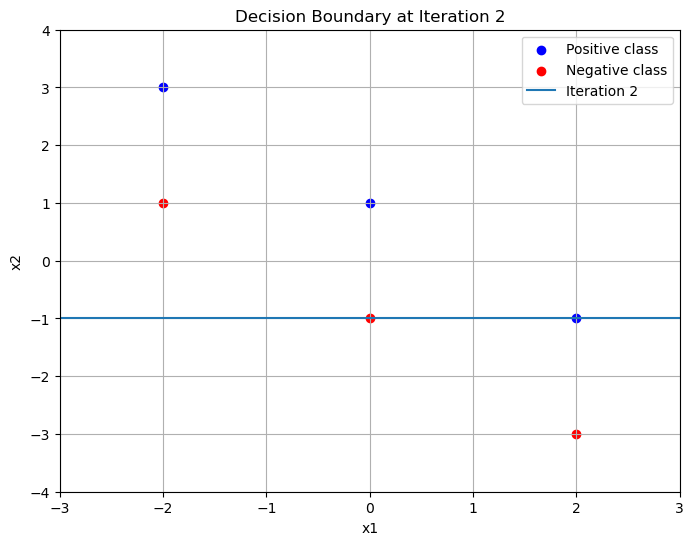

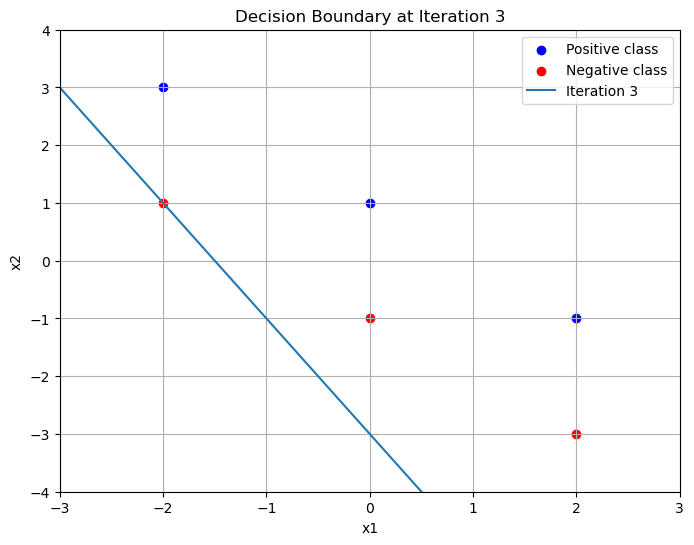

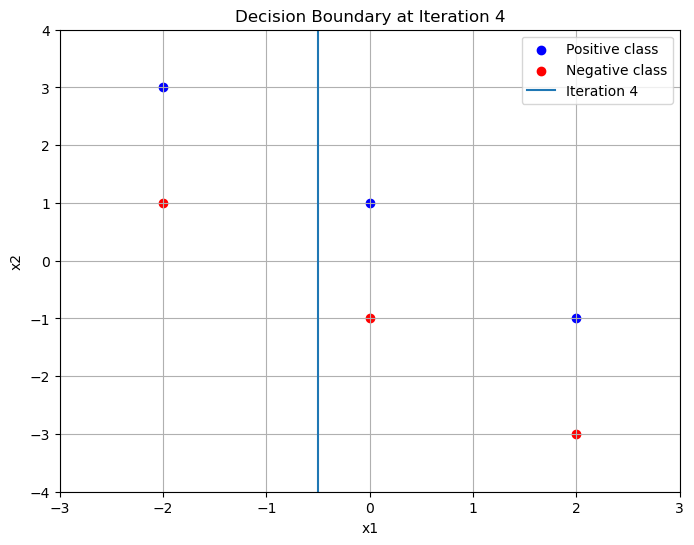

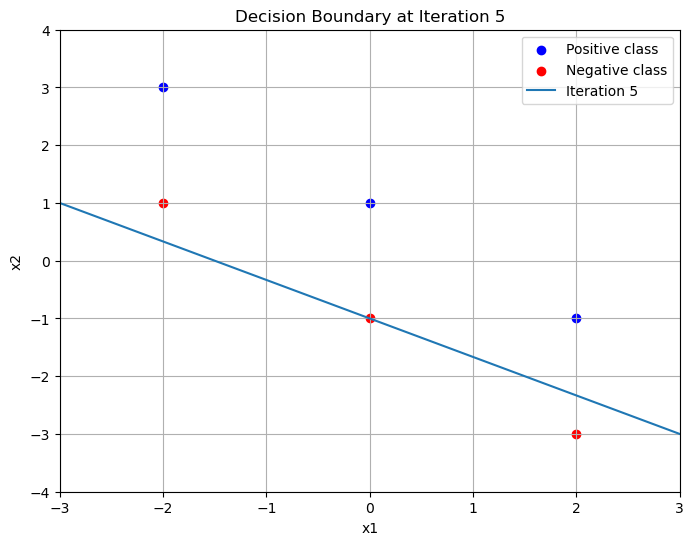

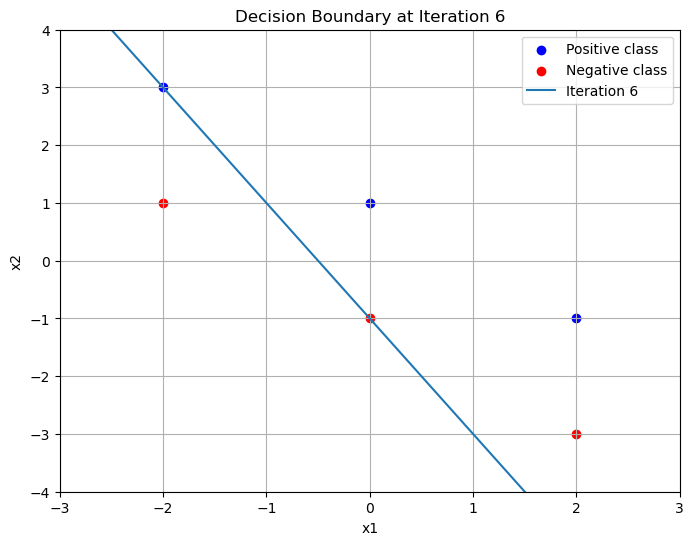

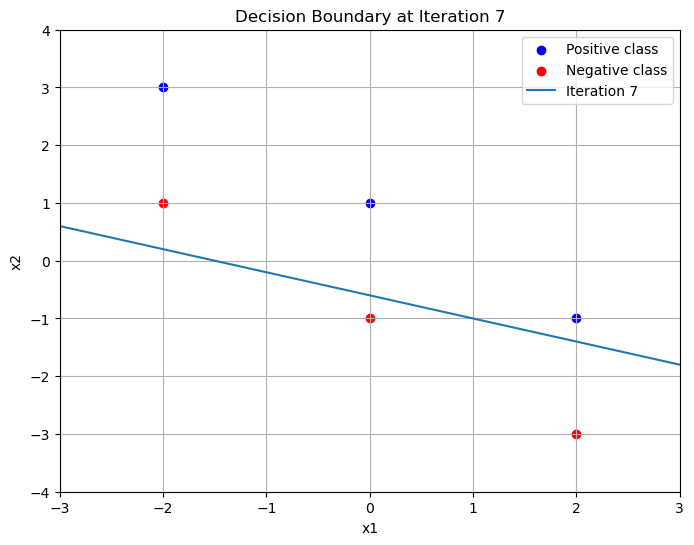

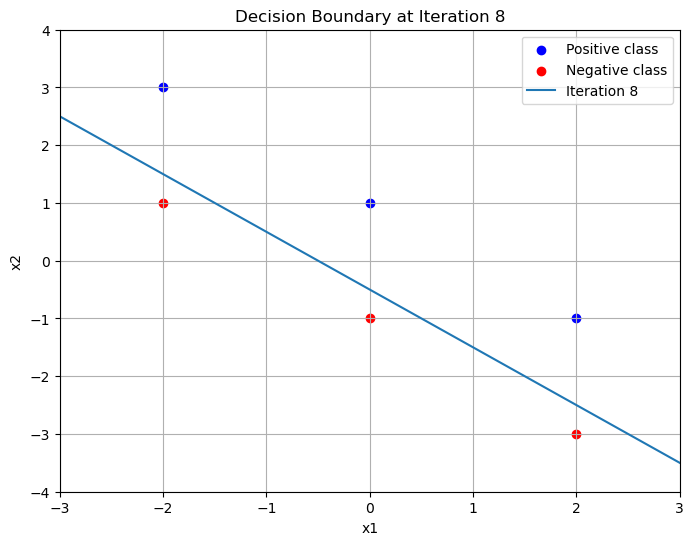

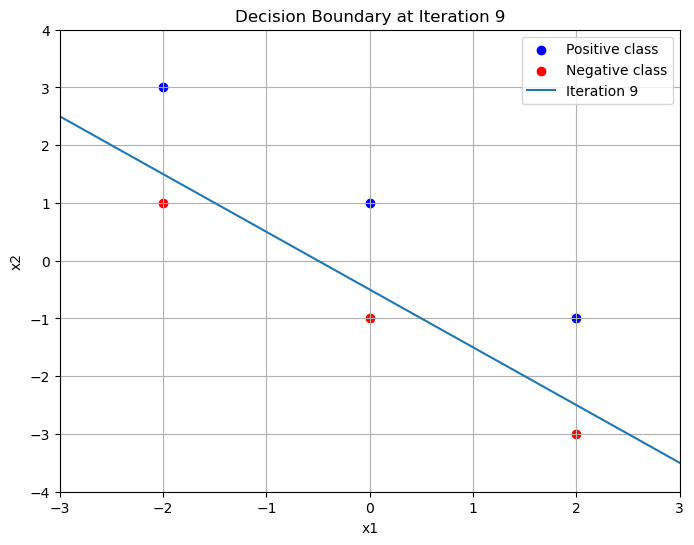

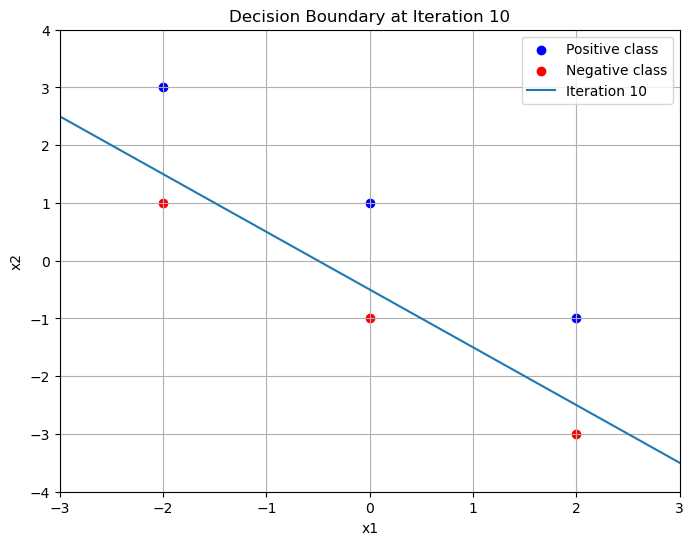

In [31]:
theta_final, theta0_final = perceptron(x, y, 10)